In [1]:
#install pytrends
!pip install pytrends


You should consider upgrading via the '/Users/dsn/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [7]:
#import the libraries
import pandas as pd                        
from pytrends.request import TrendReq

#build model
pytrend = TrendReq()



In [10]:

#provide your search terms
kw_list=['Mastercard Foundation']
pytrend.build_payload(kw_list=kw_list)


#get related queries
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                                      query  value
0                   mastercard scholarship    100
1                  mastercard scholarships     15
2       mastercard foundation scholarships     15
3                the mastercard foundation     15
4               mastercard foundation jobs     12
5                          mastercard jobs     12
6   mastercard foundation scholars program     12
7              mastercard foundation kenya      9
8             mastercard foundation uganda      6
9              mastercard foundation ghana      5
10  mastercard foundation scholarship 2020      5
11  mastercard foundation scholarship 2021      5
12                                  mcgill      5
13                      mastercard careers      4
14                    edinburgh university      4
15                  master card foundation      4
16  mastercard foundation scholarship 2019      4
17                 university of edinburgh      4
18            mastercard foun

In [4]:
#build lists dataframes

top = list(related_queries.values())[0]['top']
rising = list(related_queries.values())[0]['rising']

#convert lists to dataframes

dftop = pd.DataFrame(top)
dfrising = pd.DataFrame(rising)

#join two data frames
joindfs = [dftop, dfrising]
allqueries = pd.concat(joindfs, axis=1)

#function to change duplicates

cols=pd.Series(allqueries.columns)
for dup in allqueries.columns[allqueries.columns.duplicated(keep=False)]: 
    cols[allqueries.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(allqueries.columns.get_loc(dup).sum())]
                                    )
allqueries.columns=cols

#rename to proper names

allqueries.rename({'query': 'top query', 'value': 'top query value', 'query.1': 'related query', 'value.1': 'related query value'}, axis=1, inplace=True) 

#check your dataset
allqueries.head(50)



,top query,top query value,related query,related query value
0,mastercard scholarship,100,mastercard foundation scholarship 2020,180150.0
1,mastercard scholarships,15,mastercard foundation scholarship 2021,173650.0
2,mastercard foundation scholarships,15,mastercard foundation scholarship 2018,114900.0
3,the mastercard foundation,15,mastercard foundation scholarship 2022,68300.0
4,mastercard foundation jobs,12,mastercard foundation scholarship 2019/2020,67150.0
5,mastercard jobs,12,baobab,30650.0
6,mastercard foundation scholars program,12,mastercard center for inclusive growth,23850.0
7,mastercard foundation kenya,9,knust mastercard foundation scholarship 2020,15300.0
8,mastercard foundation uganda,6,careers malawi,10150.0
9,mastercard foundation ghana,5,mastercard foundation scholarship 2019,5100.0


In [5]:
#save to csv
allqueries.to_csv('allqueries.csv')


## See Keyword Search by Countries.

In [15]:

import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
trends = TrendReq()


In [19]:
trends.build_payload(kw_list=["Mastercard Foundation"])
data = trends.interest_by_region()
data = data.sort_values(by="Mastercard Foundation", ascending=False)
data = data.head(10)
print(data)

              Mastercard Foundation
geoName                            
Rwanda                          100
Uganda                           52
Zimbabwe                         34
Ghana                            34
Ethiopia                         23
Kenya                            22
Nigeria                           8
Tanzania                          7
South Africa                      2
Canada                            1


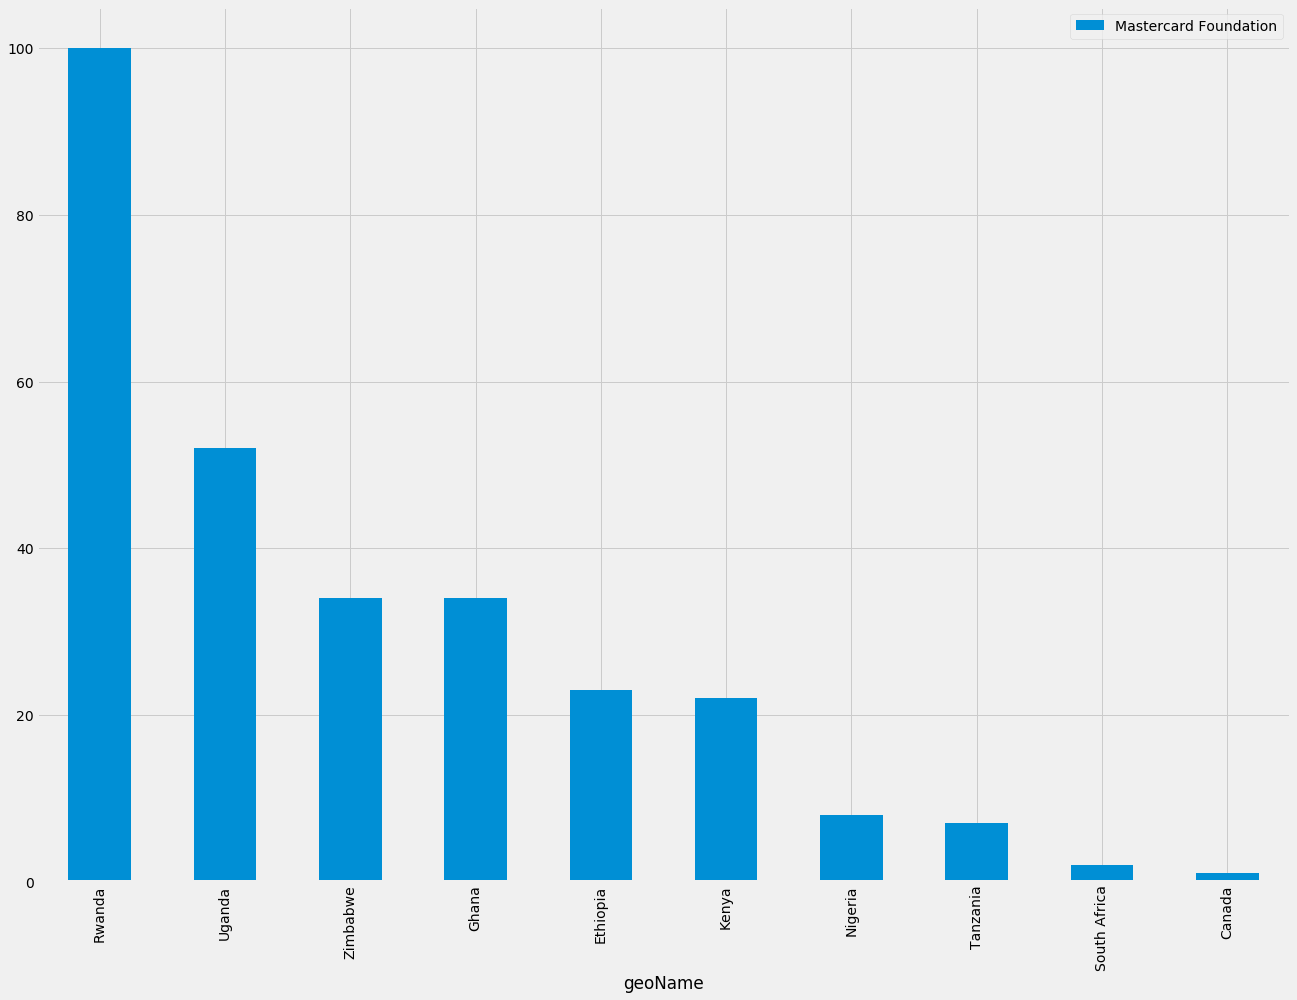

In [20]:
data.reset_index().plot(x="geoName", y="Mastercard Foundation", 
                        figsize=(20,15), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

## See Keyword Search by Year

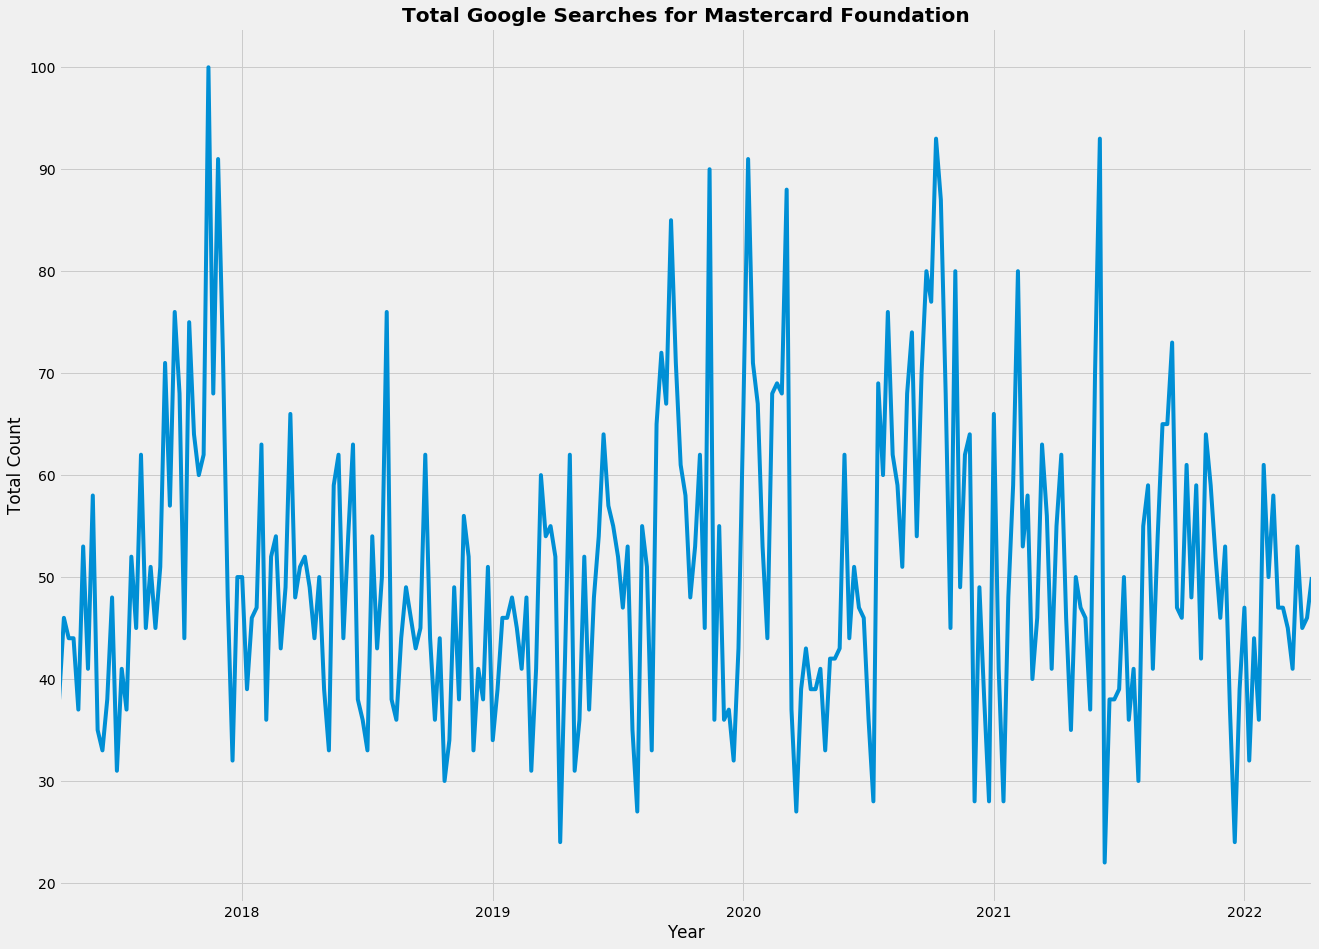

In [22]:
data = TrendReq(hl='en-US', tz=360)
data.build_payload(kw_list=['Mastercard Foundation'])
data = data.interest_over_time()
fig, ax = plt.subplots(figsize=(20, 15))
data['Mastercard Foundation'].plot()
plt.style.use('fivethirtyeight')
plt.title('Total Google Searches for Mastercard Foundation', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

# Compare Keywords

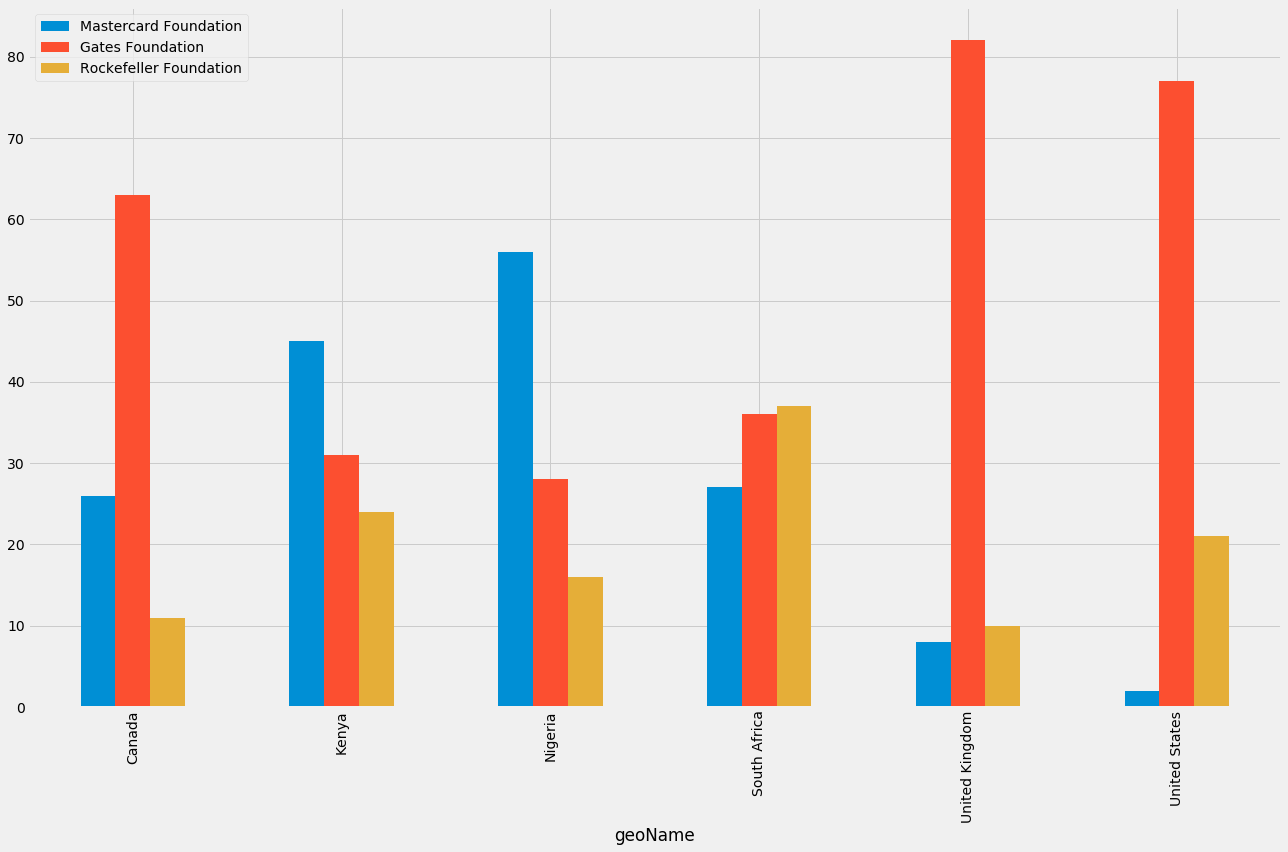

In [23]:
#import the libraries
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

#provide your search terms
kw_list=['Mastercard Foundation', 'Gates Foundation', 'Rockefeller Foundation']

#search interest per region
#run model for keywords (can also be competitors)
pytrend.build_payload(kw_list, timeframe='today 1-m')

# Interest by Region
regiondf = pytrend.interest_by_region()
#looking at rows where all values are not equal to 0
regiondf = regiondf[(regiondf != 0).all(1)]

#drop all rows that have null values in all columns
regiondf.dropna(how='all',axis=0, inplace=True)

#visualise
regiondf.plot(figsize=(20, 12), y=kw_list, kind ='bar')